<a href="https://www.kaggle.com/code/vainero/customers-segmentation?scriptVersionId=114295387" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<img src="https://github.com/vainero/Files/blob/main/Customers.gif?raw=true">

<h1 style="color:#62544c; font-style:italic; font-family:Open Sans Light;"> <center>Thanks for visiting my notebook!</center> </h1>

<h1 style="background-color:#545a4c; color: #dbd2d8; font-family:Open Sans Light; font-size:250%;text-align:center;border-radius: 10px 10px;">Introduction</h1>

- In this project, you have been provided extensive data on the bank's customers for the past 6 months.
- Data includes transaction frequency, amount, tenure... etc.
- The bank marketing team would like to leverage AI/ML to launch a targeted marketing ad campaign that is tailored to a specific group of customers.
- In order for this campaign to be successful, the bank has to divide its customers into at least 3 distinctive groups.
- This process is known as "marketing segmentation" and is crucial for maximizing marketing campaign conversion rate.

<h1 style="background-color:#545a4c; color: #dbd2d8; font-family:Open Sans Light;font-size:250%;text-align:center;border-radius: 10px 10px;">Import Libraries</h1>

In [79]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

import warnings
warnings.filterwarnings("ignore")

# Custom colors
class clr:
    S = '\033[32m' + '\033[111m'
    E = '\033[0m' 

<h1 style="background-color:#545a4c; color: #dbd2d8; font-family:Open Sans Light;font-size:250%;text-align:center;border-radius: 10px 10px;">Load the Data</h1>

In [80]:
# Read the dataset
df = pd.read_csv('../input/ccdata/CC GENERAL.csv') 

# Display the dataset
df.head().style.background_gradient(cmap='BrBG').set_properties(**{'font-family': 'Open Sans Light'})

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.400000,0.000000,95.400000,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.000000,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.000000,0.000000,0.000000,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.000000,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.170000,773.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.000000,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.000000,1499.000000,0.000000,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.000000,0.000000,nan,0.000000,12
4,C10005,817.714335,1.000000,16.000000,16.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.000000,678.334763,244.791237,0.000000,12


<table style="width: 100%; border-collapse: collapse; border-radius: 10px 10px; overflow: hidden;">
<thead>
		<tr>
			<th style="text-align: center; font-weight: bold; font-size:16px; background-color: #545a4c">Variable Name</th>
			<th style="text-align: center; font-weight: bold; font-size:16px; background-color: #545a4c">Description</th>
		</tr>
	</thead>
	<tbody>
		<tr style="background-color: #c0b7b0; font-size:14px">
			<td style="font-weight: bold">CAST_ID</td>
			<td>Identification of credit card holder (Categorical)</td>
		</tr>
        <tr style="background-color: #857b69; font-size:14px">
			<td style="font-weight: bold">BALANCE</td>
			<td>Total amount of money that you owe to your credit card company</td>
		</tr>
		<tr style="background-color: #c0b7b0; font-size:14px">
			<td style="font-weight: bold">BALANCE_FREQUENCY</td>
			<td> How frequently the balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)</td>
		</tr>
        <tr style="background-color: #857b69; font-size:14px">
			<td style="font-weight: bold">PURCHASES</td>
			<td>Amount of purchases made from account</td>
		</tr>
		<tr style="background-color: #c0b7b0; font-size:14px">
			<td style="font-weight: bold">ONEOFF_PURCHASES</td>
			<td>Maximum purchase amount done in one-go</td>
		</tr>
		<tr style="background-color: #857b69; font-size:14px">
			<td style="font-weight: bold">INSTALLMENTS_PURCHASES</td>
			<td>Amount of purchase done in installment</td>
		</tr>
		<tr style="background-color: #c0b7b0; font-size:14px">
			<td style="font-weight: bold">CASH_ADVANCE</td>
			<td>Cash in advance given by the user</td>
		</tr>
		<tr style="background-color: #857b69; font-size:14px">
			<td style="font-weight: bold">PURCHASES_FREQUENCY</td>
			<td>How frequently the purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)</td>
		</tr>
		<tr style="background-color: #c0b7b0; font-size:14px">
			<td style="font-weight: bold">ONEOFF_PURCHASES_FREQUENCY</td>
			<td>How frequently purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)</td>
		</tr>
		<tr style="background-color: #857b69; font-size:15px">
			<td style="font-weight: bold">PURCHASES_INSTALLMENTS_FREQUENCY</td>
			<td>How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)</td>
		</tr>
		<tr style="background-color: #c0b7b0; font-size:14px">
			<td style="font-weight: bold">CASH_ADVANCE_FREQUENCY</td>
			<td>How frequently the cash in advance being paid</td>
		</tr>
		<tr style="background-color: #857b69; font-size:14px">
			<td style="font-weight: bold">CASH_ADVANCE_TRX"</td>
			<td>Number of transactions made with "Cash in Advanced</td>
		</tr>
		<tr style="background-color: #c0b7b0; font-size:14px">
			<td style="font-weight: bold">PURCHASES_TRX</td>
			<td>Number of purchase transactions made</td>
		</tr>
		<tr style="background-color: #857b69; font-size:14px">
			<td style="font-weight: bold">CREDIT_LIMIT</td>
			<td>Limit of credit card for user</td>
		</tr>
		<tr style="background-color: #c0b7b0; font-size:14px">
			<td style="font-weight: bold">PAYMENTS</td>
			<td>Amount of payment done by user</td>
		</tr>
		<tr style="background-color: #857b69; font-size:14px">
			<td style="font-weight: bold">MINIMUM_PAYMENTS</td>
			<td>Minimum amount of payments made by user</td>
		</tr>
		<tr style="background-color: #c0b7b0; font-size:14px">
			<td style="font-weight: bold">PRC_FULL_PAYMENT</td>
			<td>Percent of full payment paid by user</td>
		</tr>
		<tr style="background-color: #857b69; font-size:14px">
			<td style="font-weight: bold">TENURE</td>
			<td>Tenure of credit card service for user</td>
		</tr> 
	</tbody>
</table>

In [81]:
# Let's get some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [82]:
# Describe the data
df.describe().T.style.background_gradient(cmap='BrBG').set_properties(**{'font-family': 'Open Sans Light'})

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.000000,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.138560
BALANCE_FREQUENCY,8950.000000,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.000000
PURCHASES,8950.000000,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.570000
ONEOFF_PURCHASES,8950.000000,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.250000
INSTALLMENTS_PURCHASES,8950.000000,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.000000
CASH_ADVANCE,8950.000000,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.211760
PURCHASES_FREQUENCY,8950.000000,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.000000,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.000000,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8950.000000,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.500000


<div style="border-radius:10px;
            background-color:#dbd2d8;
            color: #545a4c;
            border-style: solid;
            border-color: #545a4c;
            letter-spacing:0.5px;
            font-family: Open Sans Light; 
            font-size:16px;
            padding: 10px;">

- Mean **BALANCE** is $1,564

- **BALANCE_FREQUENCY** is frequently updated on average ~0.9

- **PURCHASES** average is $1,000

- **ONEOFF_PURCHASES** average is ~$600

- Average **PURCHASES_FREQUENCY** is around 0.5

- Average **ONEOFF_PURCHASES_FREQUENCY**, **PURCHASES_INSTALLMENTS_FREQUENCY**, and **CASH_ADVANCE_FREQUENCY**

- Average **CREDIT_LIMIT** is ~$4,500

- Average **PRC_FULL_PAYMENT** is 15%

- Average **TENURE** is 11.5 years


<h1 style="background-color:#545a4c; color: #dbd2d8; font-family:open sans light;font-size:250%;text-align:center;border-radius: 10px 10px;">Visualize and Explore Dataset</h1>

In [83]:
# Check the missing data
print(df.isnull().sum())
print(clr.S+'----------------------------------------\n Percentage of missing data: \n'+clr.E)
print((df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']].isnull().sum()/df['CUST_ID'].count())*100) 

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64
----------------------------------------
 Percentage of missing data: 

MINIMUM_PAYMENTS    3.497207
CREDIT_LIMIT        0.011173
dtype: float64


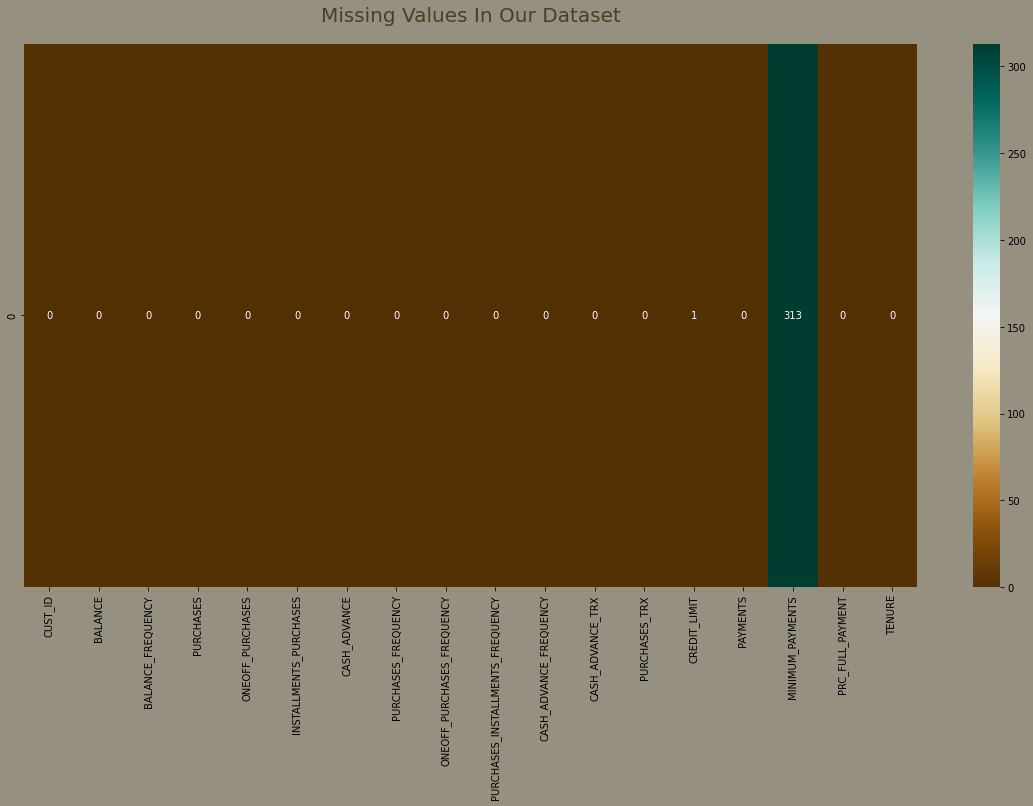

In [84]:
# Custom plot size    
plt.figure(figsize = (20,10), facecolor = '#969080')
sns.heatmap(pd.DataFrame(df.isna().sum()).T,annot=True, cmap = 'BrBG',fmt='d')
plt.title('Missing Values In Our Dataset',fontsize=20, color = '#414422', y=1.03)
plt.show()

In [85]:
# Fill up the missing elements with mean of the MINIMUM_PAYMENTS
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 
                  'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

# Fill up the missing elements with mean of the CREDIT_LIMIT
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 
                  'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [86]:
# Chek duplicated entries in the data
print(clr.S+'Duplicated in our dataset is:'+clr.E, df.duplicated().sum())

Duplicated in our dataset is: 0


In [87]:
# Drop Customer ID column 'CUST_ID'
df.drop('CUST_ID', axis = 1, inplace = True)
df.head().style.background_gradient(cmap='BrBG').set_properties(**{'font-family': 'Open Sans Light'})

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.400000,0.000000,95.400000,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.000000,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.000000,0.000000,0.000000,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.000000,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.170000,773.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.000000,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.000000,1499.000000,0.000000,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.000000,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.000000,16.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.000000,678.334763,244.791237,0.000000,12


<div style="border-radius:10px;
            background-color:#dbd2d8;
            color: #545a4c;
            border-style: solid;
            border-color: #545a4c;
            letter-spacing:0.5px;
            font-family: Open Sans Light; 
            font-size:16px;
            padding: 10px;">
    
- Distplot combines the matplotlib.hist function with seaborn kdeplot().

- KDE Plot represents the Kernel Density Estimate.

- KDE is used for visualizing the Probability Density of a continuous variable.

- KDE demonstrates the probability density at different values in a continuous variable

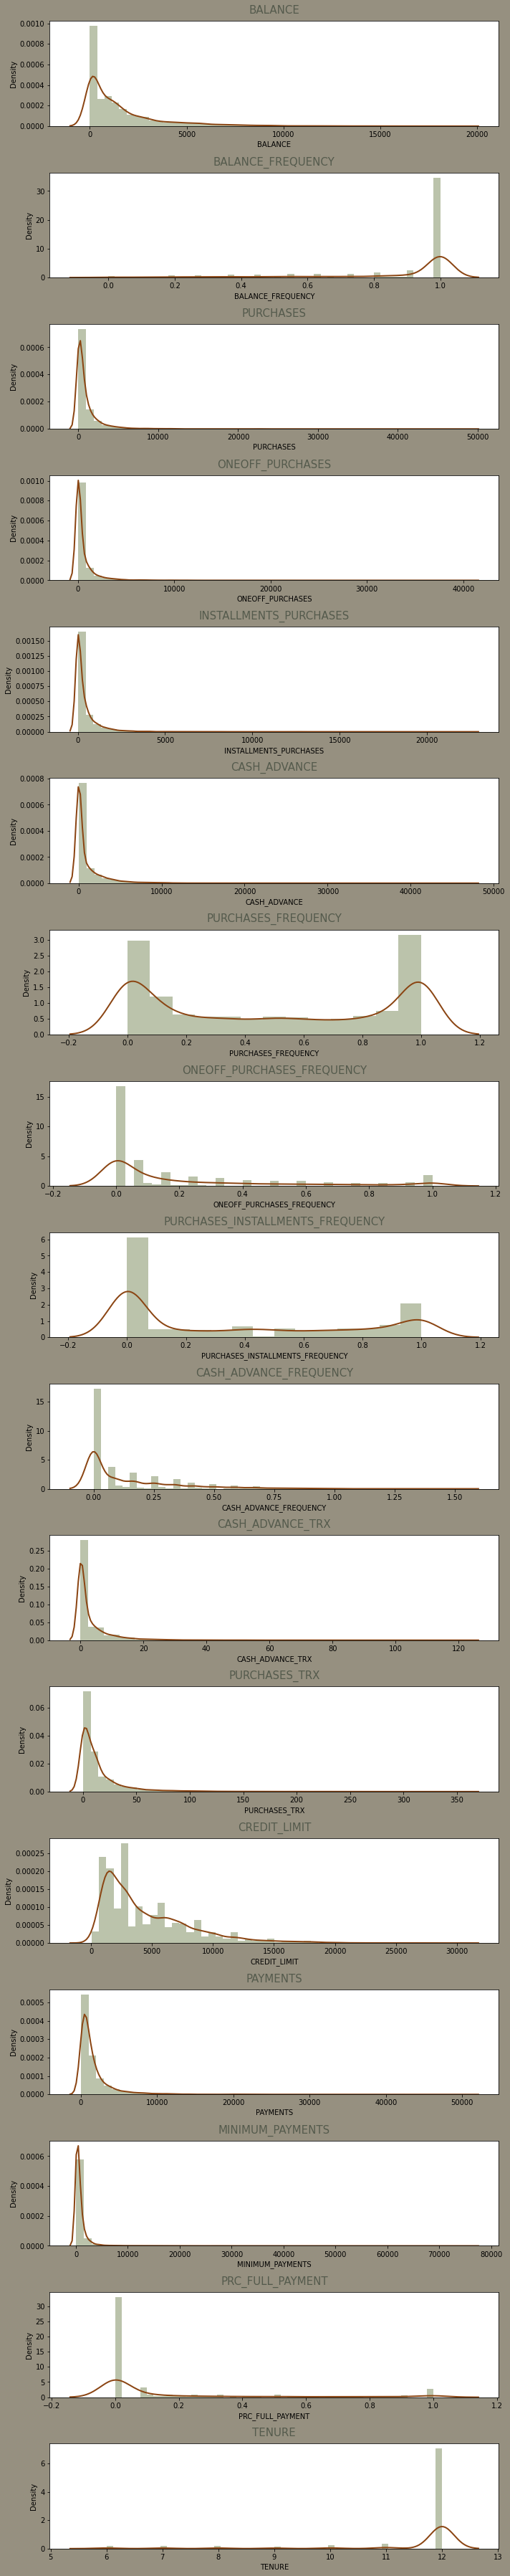

In [88]:
# Plot the distribution
plt.figure(figsize = (10,50), facecolor = '#969080')
for i in range(len(df.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]], 
                 kde_kws={'color':'saddlebrown', 'lw':2, 'label':'KDE'}, hist_kws={'color':'darkolivegreen'})                 
    plt.title(df.columns[i], color= '#545a4c', fontsize = 15, y=1.03)
plt.tight_layout()

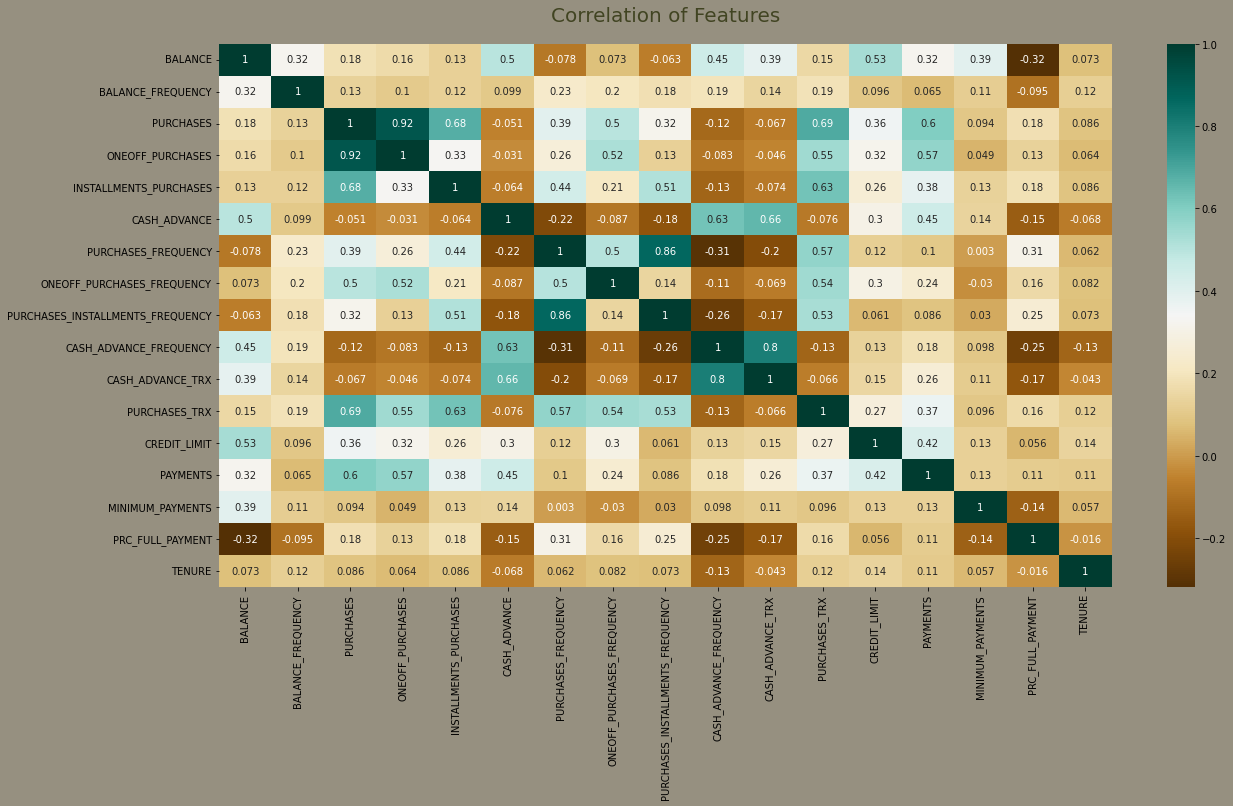

In [89]:
# Correlation matrix between features
correlations = df.corr()
f, ax = plt.subplots(figsize=(20,10), facecolor = '#969080')
plt.title('Correlation of Features',fontsize=20, color = '#414422', y=1.03)
sns.heatmap(correlations, annot = True, cmap='BrBG');

<h1 style="background-color:#545a4c; color: #dbd2d8; font-family:open sans light;font-size:250%;text-align:center;border-radius: 10px 10px;">Find the Optimal Number of Clusters Using Elbow Method</h1> 


<div style="border-radius:10px;
            background-color:#dbd2d8;
            color: #545a4c;
            border-style: solid;
            border-color: #545a4c;
            letter-spacing:0.5px;
            font-family: Open Sans Light; 
            font-size:16px;
            padding: 10px;">
    
- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset.
    
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
    
- Source:
    
   https://en.wikipedia.org/wiki/Elbow_method_(clustering)
    
   https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [90]:
# Scale the data first
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled.shape

(8950, 17)

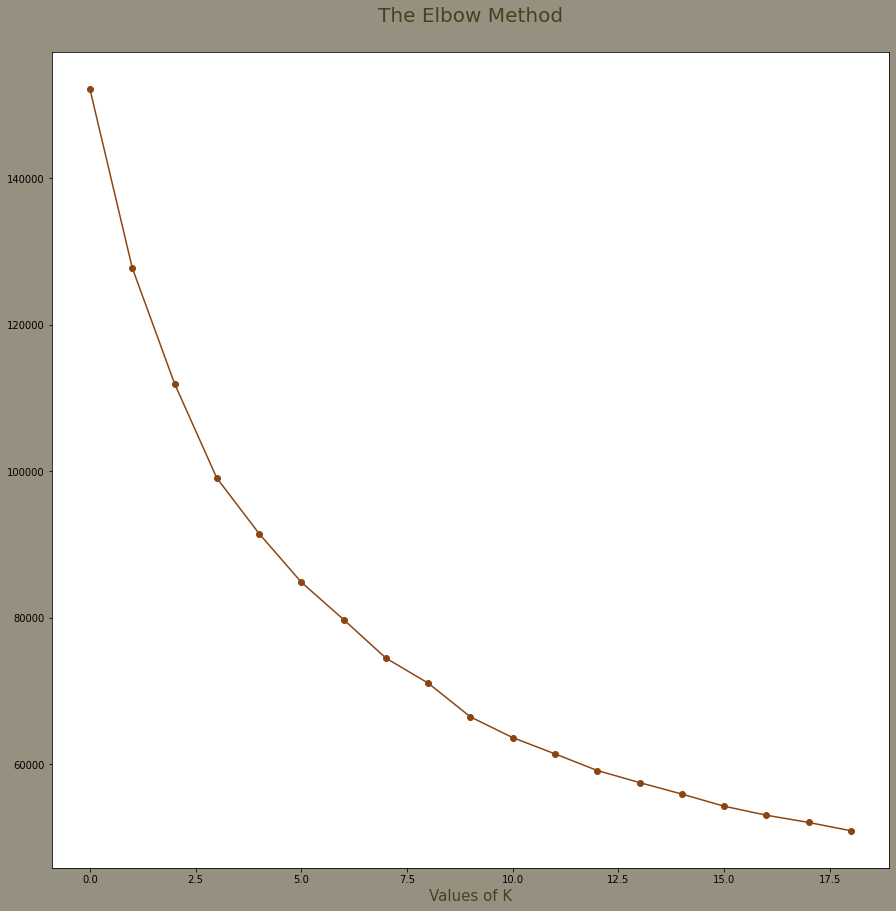

In [91]:
scores_1 = []
range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scaled)
    scores_1.append(kmeans.inertia_)

plt.figure(figsize = (15,15), facecolor = '#969080') 
plt.plot(scores_1, 'bx-', marker = 'o', color = 'saddlebrown')
plt.xlabel('Values of K', fontsize = 15, color = '#414422')
plt.title('The Elbow Method',fontsize = 20, color = '#414422', y = 1.03);

We can abserve that, 4th cluster seems to be forming the elbow of the curve. However, tha values does not reduce linearly until 8th cluster. Let's choose the number of clusters to be 7 or 8.

<h1 style="background-color:#545a4c; color: #dbd2d8; font-family:open sans light;font-size:250%;text-align:center;border-radius: 10px 10px;">Apply K-Means Method</h1> 

In [92]:
kmeans = KMeans(7)
kmeans.fit(df_scaled)
labels = kmeans.labels_ # Labels (cluster) associated to each data point

kmeans.cluster_centers_.shape

(7, 17)

In [93]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, 
                               columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.340110,0.353867,0.042384,-0.078359,0.243873,-0.369181,0.983876,0.223223,0.896256,-0.472471,-0.360688,0.240743,-0.133199,-0.173199,-0.085982,0.346330,0.272299
1,1.643570,0.397990,-0.219957,-0.155611,-0.234271,1.951820,-0.466663,-0.187324,-0.421420,1.887241,1.879666,-0.263379,0.999374,0.773657,0.544022,-0.397350,0.076094
2,-0.701518,-2.140670,-0.307382,-0.232082,-0.300312,-0.321272,-0.539985,-0.439345,-0.427871,-0.521880,-0.376989,-0.415855,-0.174723,-0.191326,-0.256819,0.287092,0.198725
3,0.006697,0.403067,-0.346867,-0.227368,-0.402212,-0.108684,-0.831846,-0.365116,-0.758277,0.081260,-0.044339,-0.471697,-0.308145,-0.249814,-0.005285,-0.455519,0.272801
4,-0.341523,-0.328638,-0.280693,-0.207224,-0.282636,0.059257,-0.170349,-0.270729,-0.206840,0.293010,-0.007707,-0.379208,-0.563088,-0.389808,-0.208492,0.022392,-3.178452
5,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
6,0.574271,0.459534,1.842440,1.577256,1.458671,-0.229737,1.152101,1.783941,0.981571,-0.340514,-0.251868,2.157894,1.132376,1.003704,0.225692,0.435256,0.311447


<img src="https://github.com/vainero/Files/blob/main/Segment.png?raw=true">

<div style="border-radius:10px;
            background-color:#dbd2d8;
            color: #545a4c;
            border-style: solid;
            border-color: #545a4c;
            letter-spacing:0.5px;
            font-family: Open Sans Light; 
            font-size:16px;
            padding: 10px;">

- First customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money. Cluster with lowest balance, lowest cash advance, and percentage of full payment = 23%. 
- Second customers cluster (Revolvers): who use credit card as a loan (most lucrative sector): highest balance and cash advance, low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%).
- Third customers cluster (VIP/Prime): high credit limit $16,000, and highest percentage of full payment, target for increase credit limit and increase spending habits. 
- Fourth customers cluster (Low tenure): these are customers with low tenure (7 years), low balance.

In [94]:
# Transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, 
                               columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,856.564555,0.961099,1093.757970,462.377690,631.599326,204.681415,0.885227,0.269049,0.720632,0.040598,0.787399,20.693810,4009.818524,1231.748506,663.828717,0.255010,11.881724
1,4985.426404,0.971551,533.263134,334.154897,199.218868,5071.927861,0.303056,0.146575,0.196954,0.512800,16.076170,8.163221,8130.581660,3972.805416,2132.026523,0.037496,11.619151
2,104.323498,0.370166,346.479515,207.228619,139.499264,305.149670,0.273628,0.071393,0.194391,0.030711,0.676151,4.373222,3858.735937,1179.274159,265.700226,0.237684,11.783264
3,1578.413793,0.972754,262.119174,215.052911,47.352579,750.956671,0.156491,0.093537,0.063079,0.151405,2.946248,2.985209,3373.292448,1009.956489,851.890464,0.020483,11.882395
4,853.624114,0.799419,403.500612,248.488085,155.483485,1103.135659,0.421981,0.121694,0.282234,0.193778,3.196232,5.284144,2445.705572,604.687721,378.325620,0.160264,7.263736
5,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
6,2759.771892,0.986130,4939.606003,3210.358741,1730.125739,497.102328,0.952745,0.734642,0.754539,0.067004,1.530015,68.346999,8614.494876,4638.769088,1390.172330,0.281019,11.934114


In [95]:
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans

array([3, 0, 2, ..., 4, 4, 4], dtype=int32)

In [96]:
# Concatenate the clusters labels to our original dataframe
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


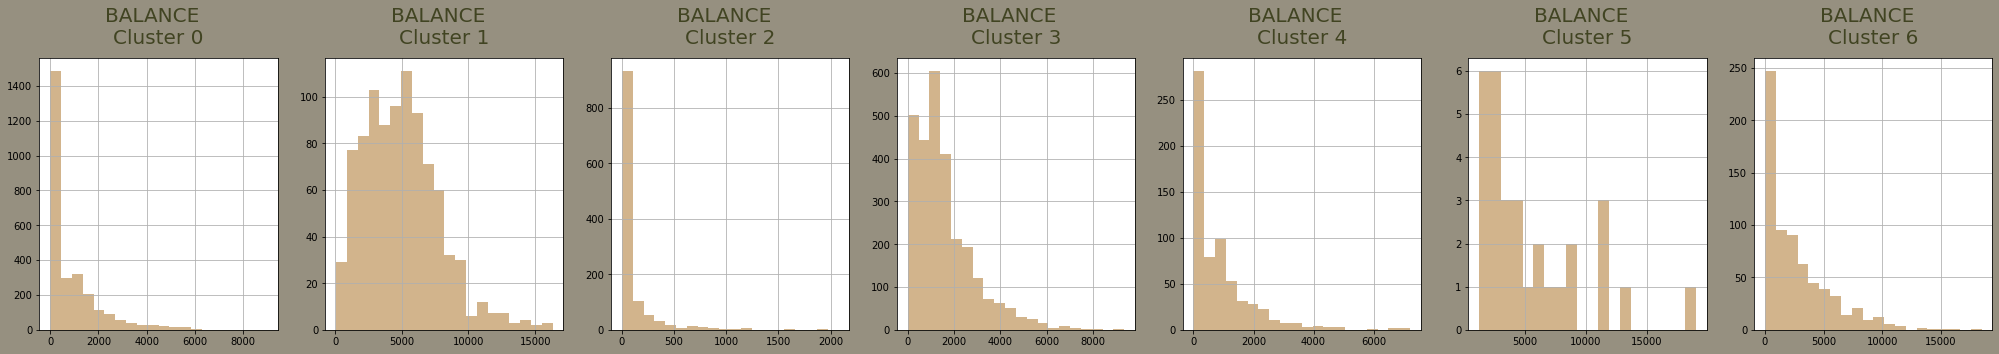

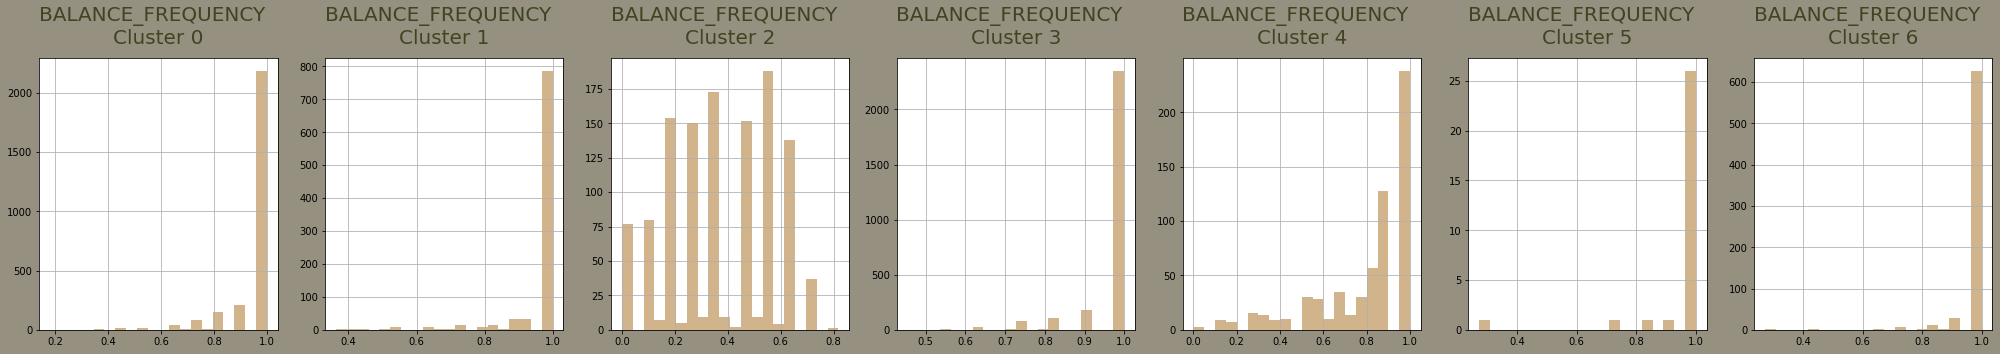

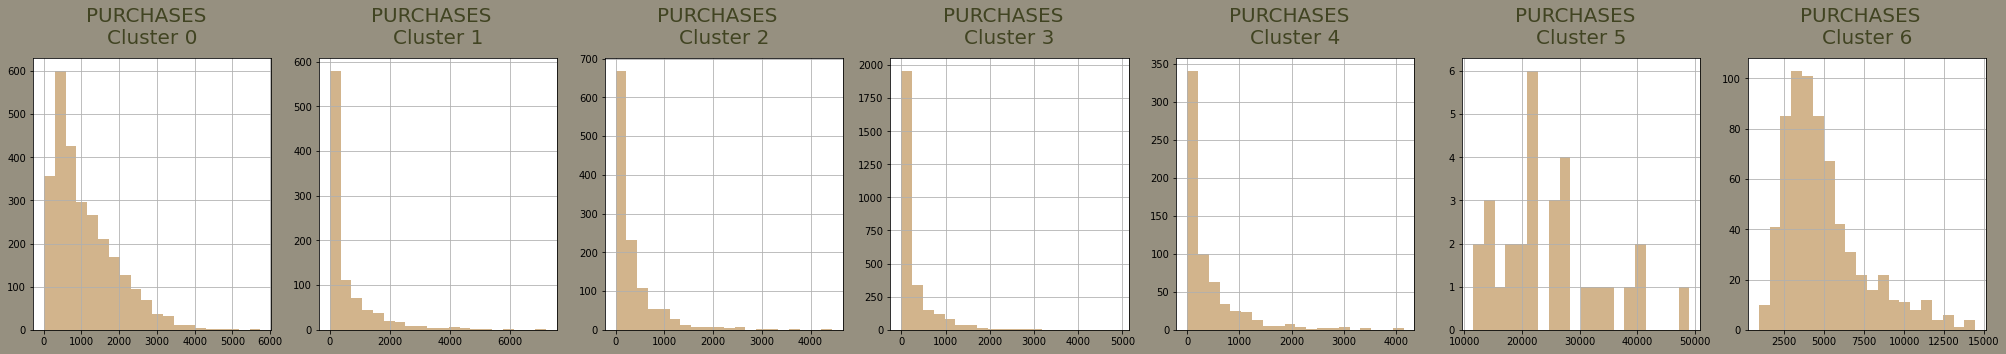

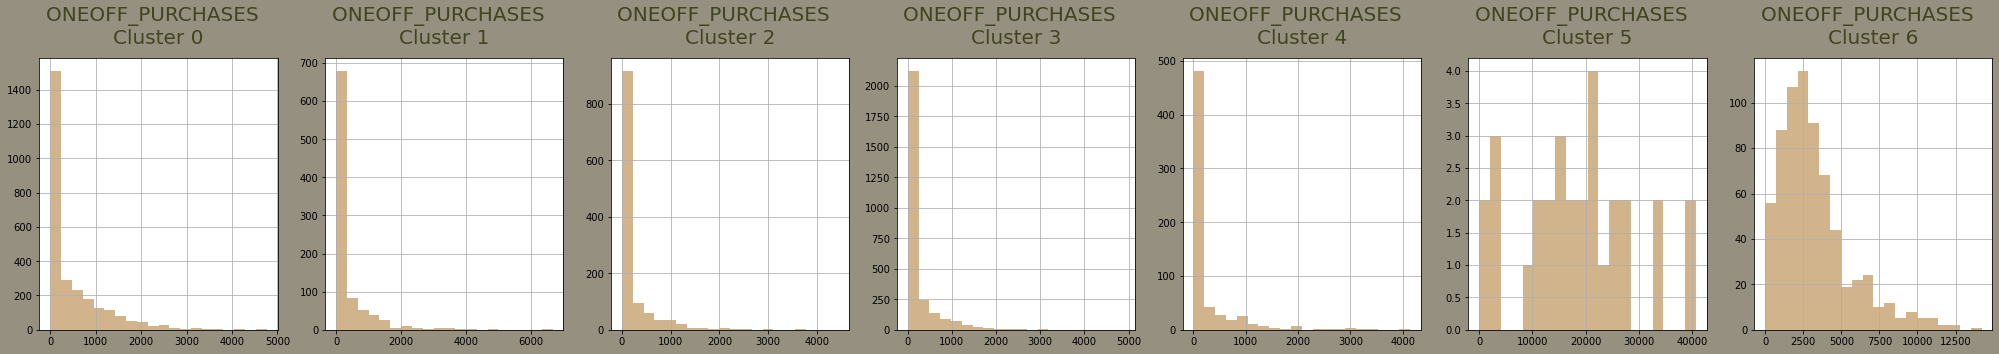

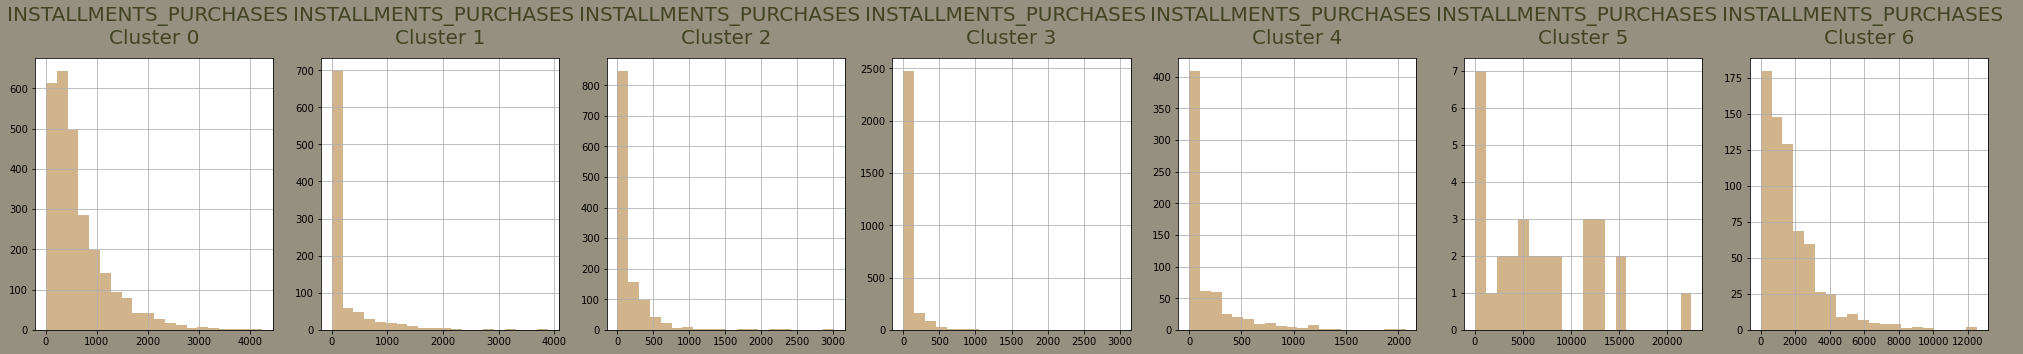

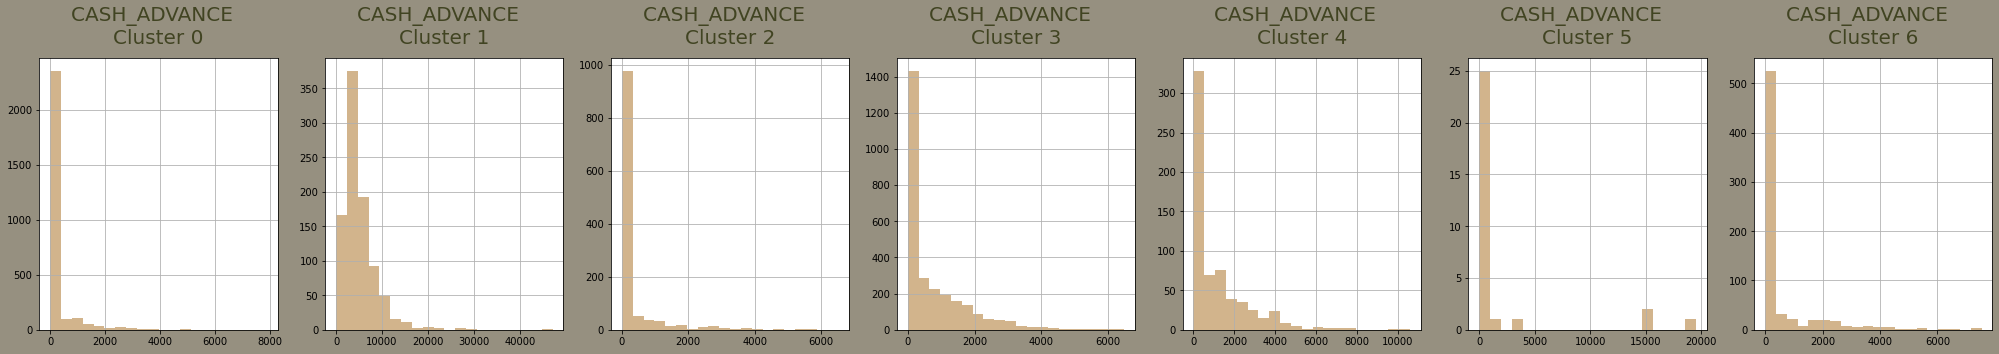

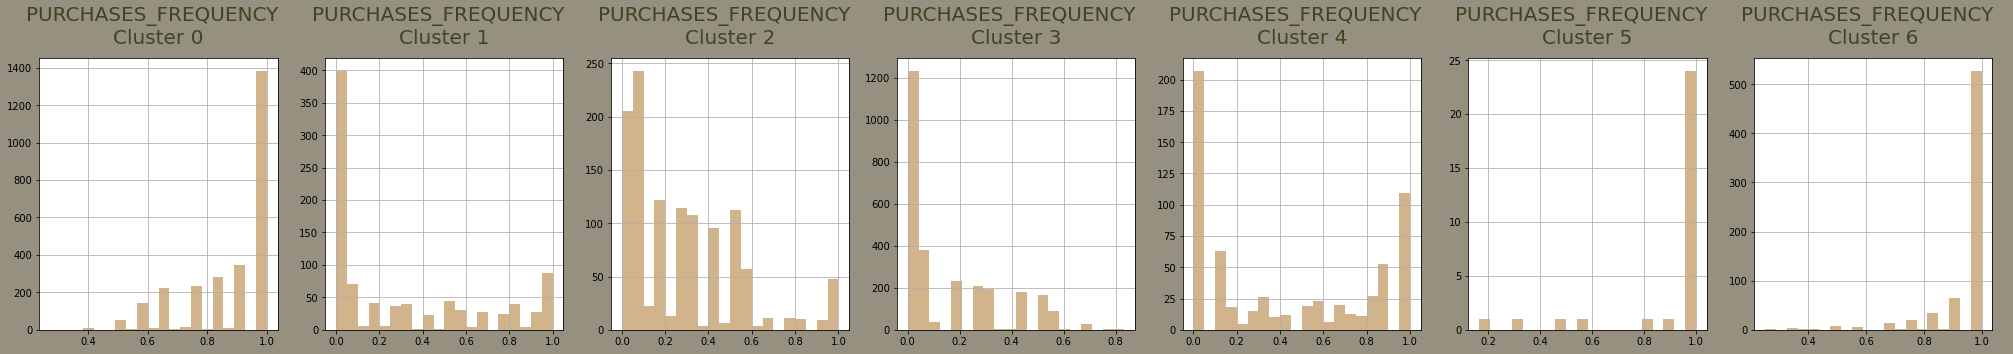

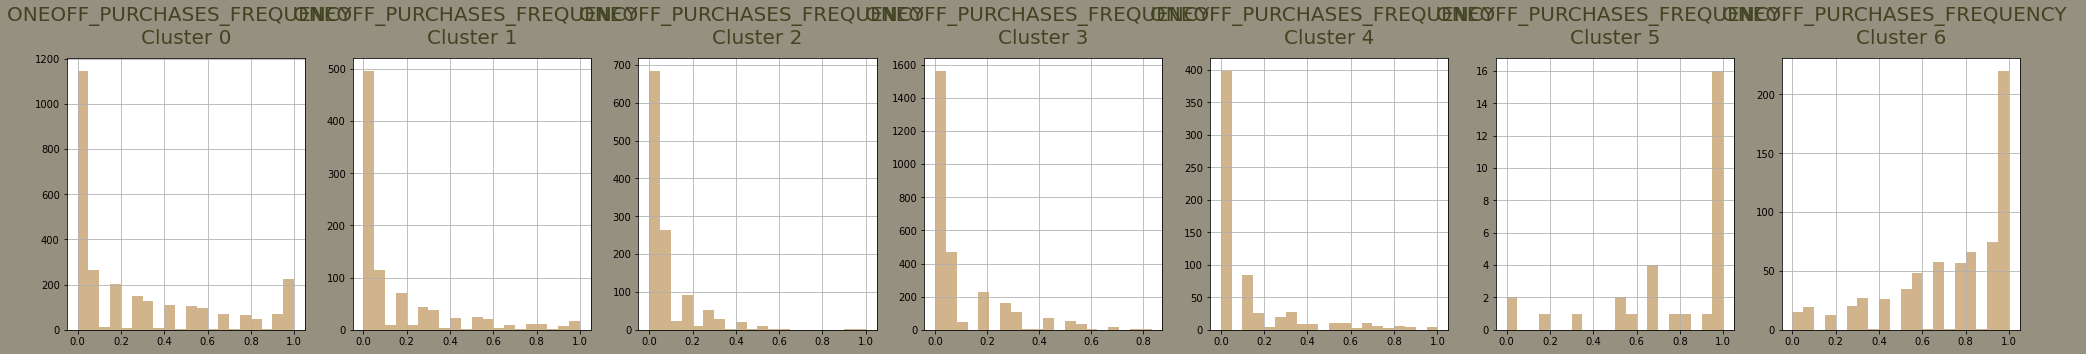

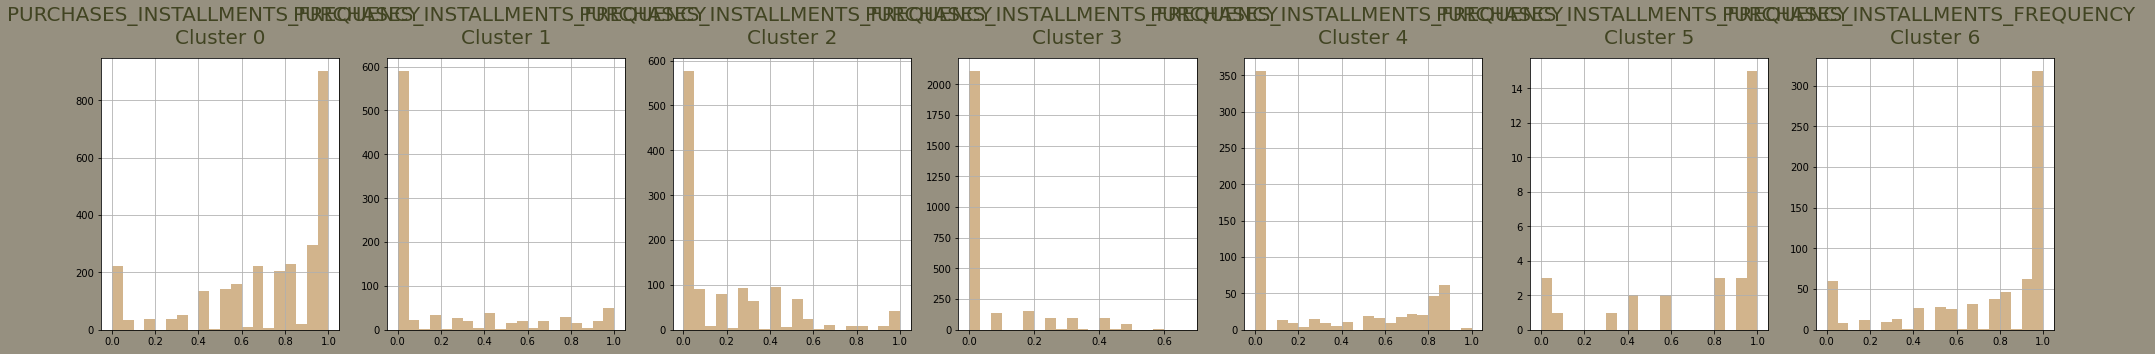

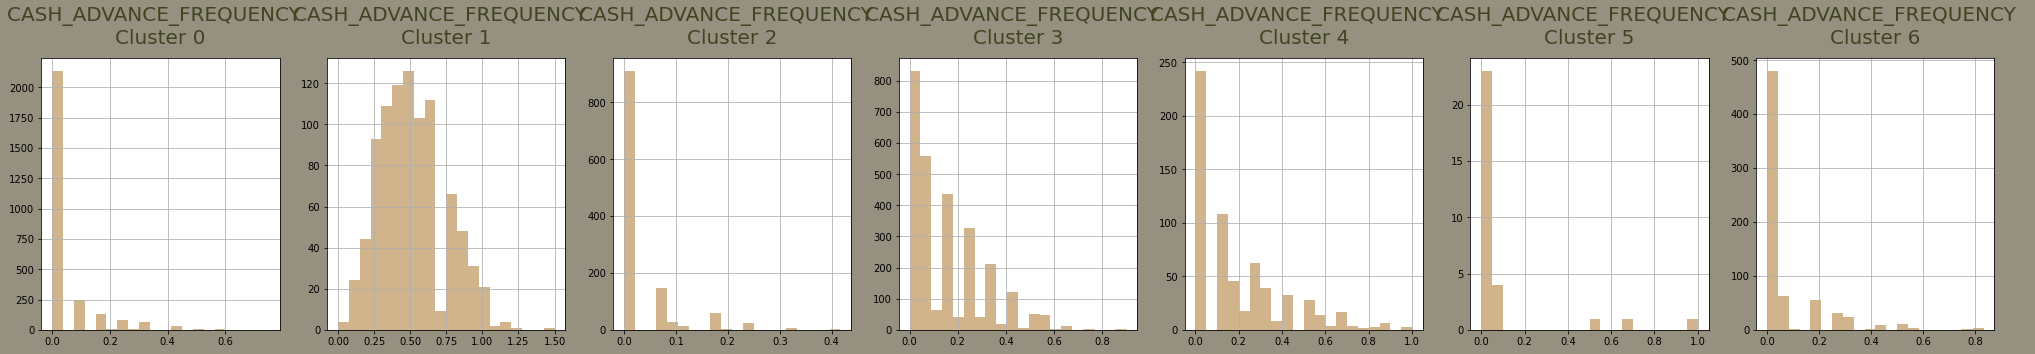

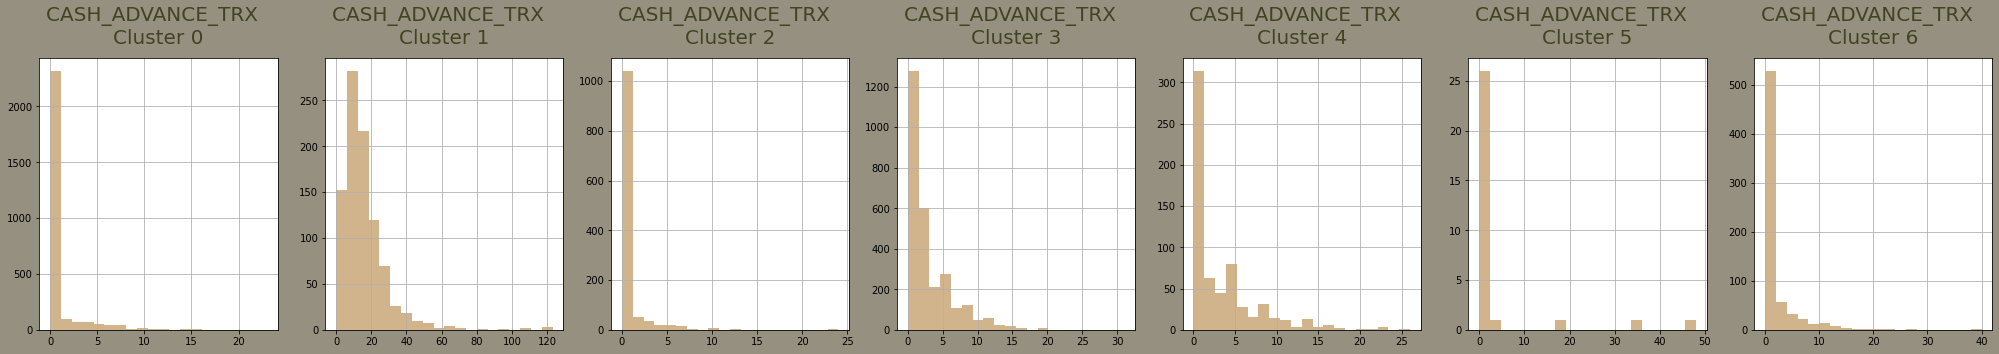

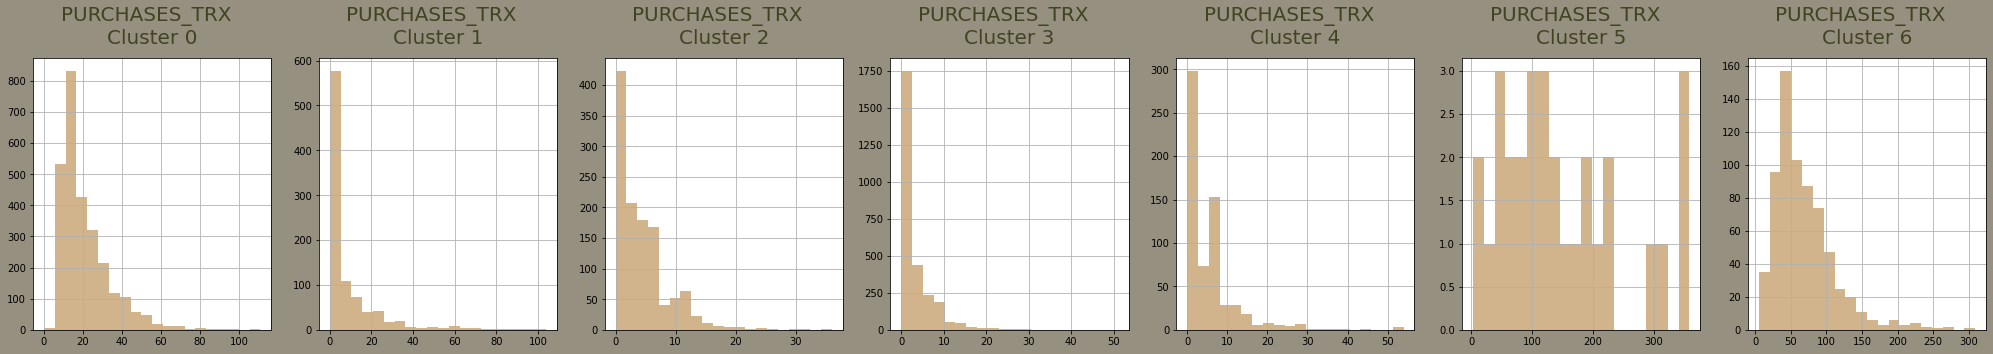

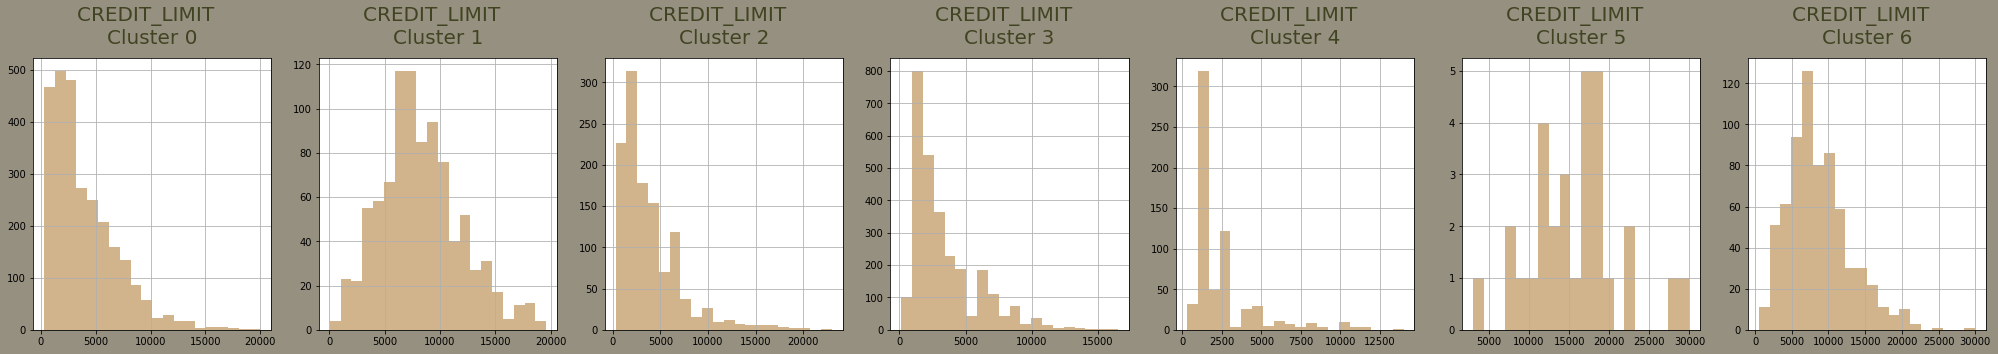

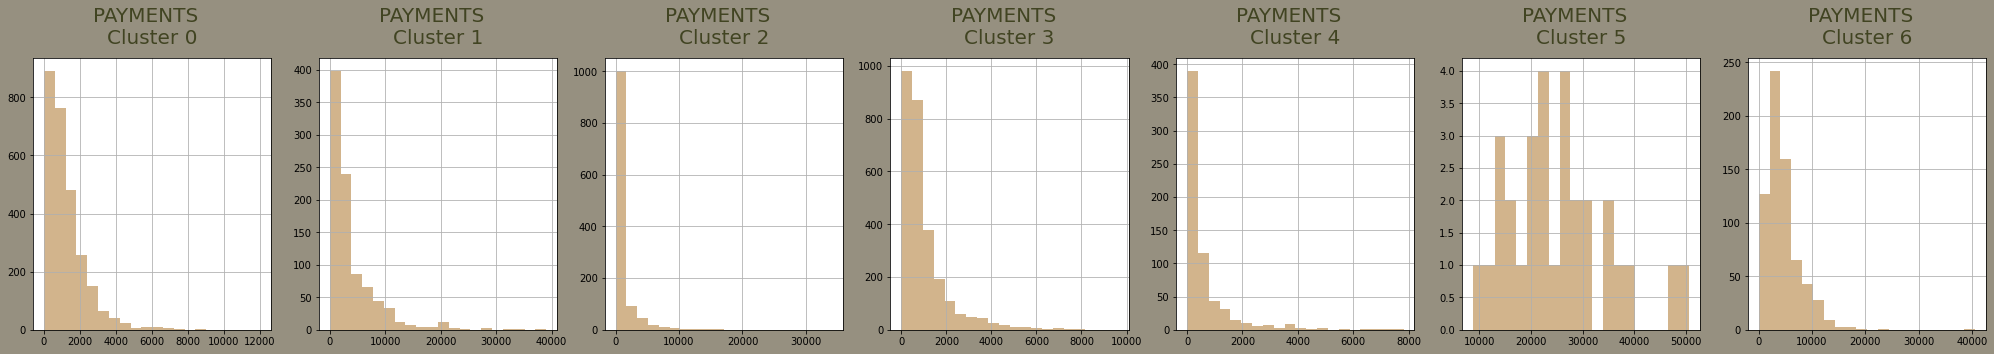

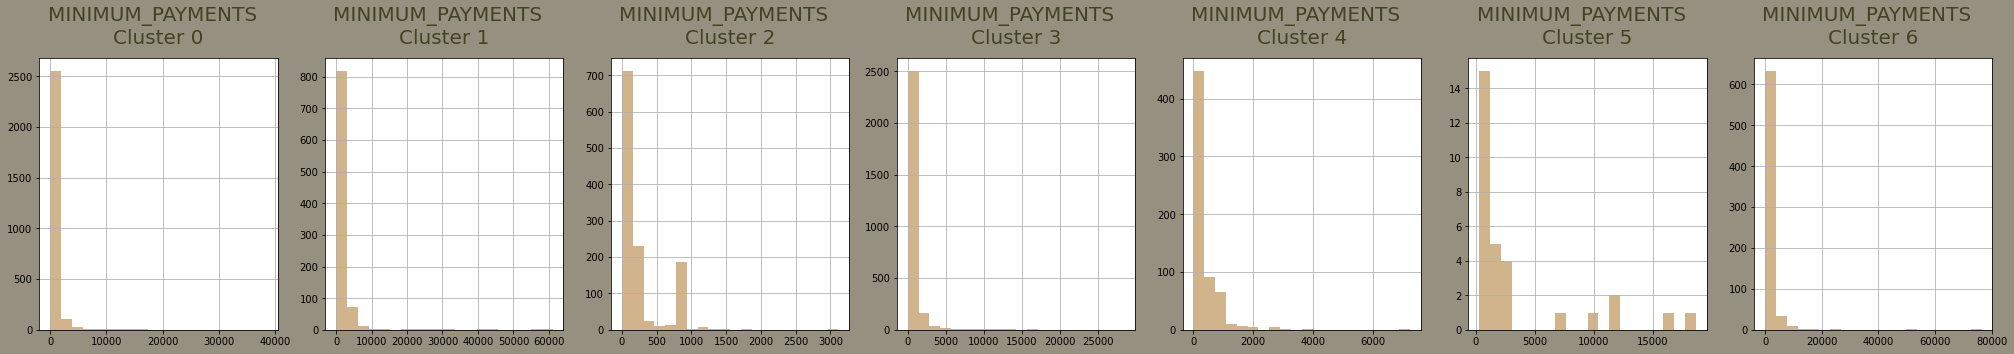

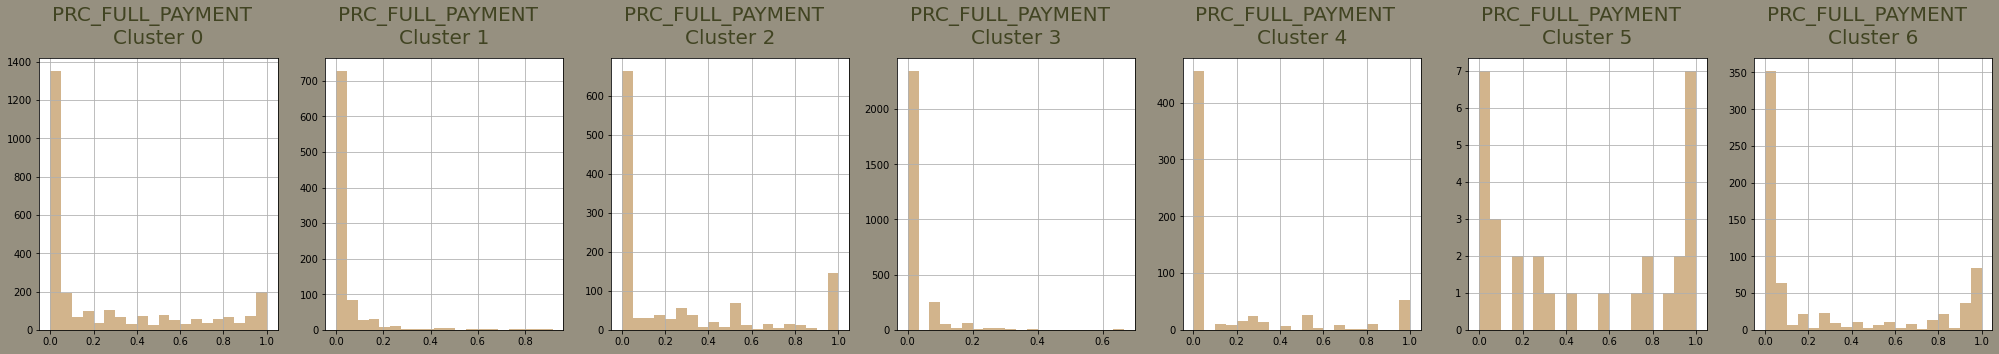

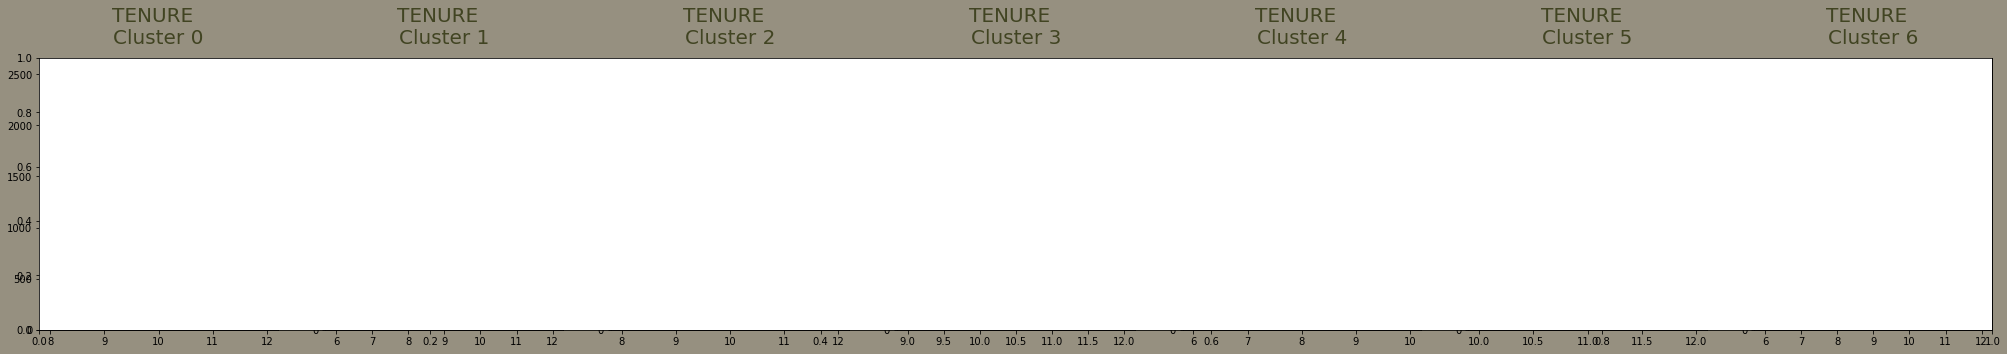

In [97]:
# Plot the histogram of various clusters
for i in df.columns:
    plt.figure(figsize=(35,5), facecolor='#969080')
    for j in range(7):
        plt.subplot(1,7,j+1)
        cluster = df_cluster[df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20, color = 'tan', lw = 2)  
        plt.title('{}  \nCluster {}'.format(i,j), color='#414422', fontsize = 20, y = 1.03)
ax = plt.axes()
        
plt.show();

<h1 style="background-color:#545a4c; color: #dbd2d8; font-family:open sans light;font-size:250%;text-align:center;border-radius: 10px 10px;">Apply PCA</h1> 

<div style="border-radius:10px;
            background-color:#dbd2d8;
            color: #545a4c;
            border-style: solid;
            border-color: #545a4c;
            letter-spacing:0.5px;
            font-family: Open Sans Light; 
            font-size:16px;
            padding: 10px;">

###  Principal Component Analysis (PCA) 
    
- PCA is an unsupervised machine learning algorithm.
    
- PCA performs dimensionality reductions while attemting at keeping the original information unchanged.
    
- PCA works by trying to find a new set of features called components.
    
- Components are composites of the uncorrelated given input features.

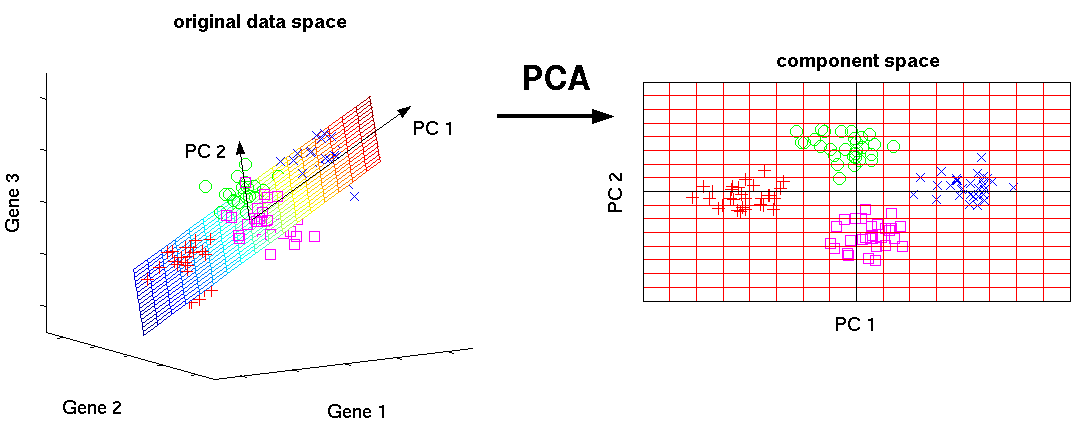

In [98]:
# Obtain the principal components
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-1.68222126, -1.07643827],
       [-1.13829952,  2.50648172],
       [ 0.96968249, -0.38352631],
       ...,
       [-0.92620292, -1.81077166],
       [-2.33654973, -0.65796022],
       [-0.55641974, -0.40049808]])

In [99]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df.head().style.background_gradient(cmap='BrBG').set_properties(**{'font-family': 'Open Sans Light'})

,pca1,pca2
0,-1.682221,-1.076438
1,-1.138300,2.506482
2,0.969682,-0.383526
3,-0.873628,0.043185
4,-1.599435,-0.688572


In [100]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head().style.background_gradient(cmap='BrBG').set_properties(**{'font-family': 'Open Sans Light'})

,pca1,pca2,cluster
0,-1.682221,-1.076438,3
1,-1.138300,2.506482,1
2,0.969682,-0.383526,0
3,-0.873628,0.043185,3
4,-1.599435,-0.688572,3


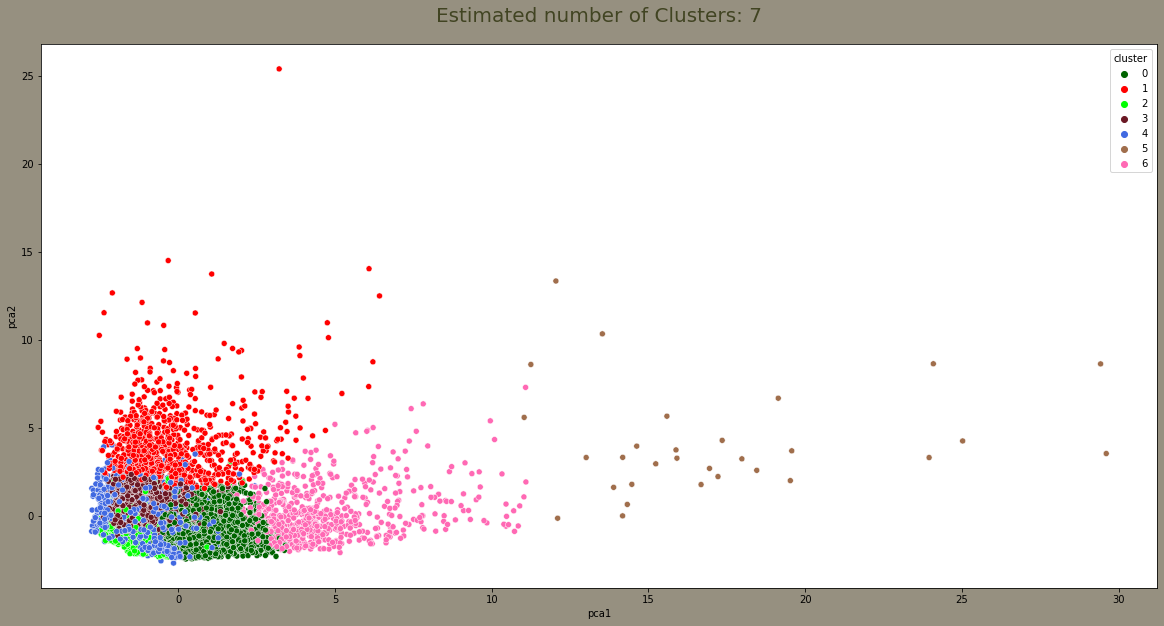

In [101]:
plt.figure(figsize = (20,10), facecolor= '#969080')
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', 
                     data=pca_df, 
                     palette = ['darkgreen', 'red', 'lime', '#6b1824', 
                                'royalblue', '#a06e4c', 'hotpink'])
plt.title('Estimated number of Clusters: 7', fontsize = 20, color='#414422', y=1.03)
plt.show();

In [102]:
# Let's try the model with 4 clusters
kmeans = KMeans(4)
kmeans.fit(df_scaled)
labels = kmeans.labels_ 

cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, 
                               columns = [df.columns])

# Transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, 
                               columns = [df.columns])

y_kmeans = kmeans.fit_predict(df_scaled)

# Concatenate the clusters labels to our original dataframe
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)

# Obtain the principal components
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_scaled)

# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])

# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)

pca_df.head().style.background_gradient(cmap='BrBG').set_properties(**{'font-family': 'Open Sans Light'})

,pca1,pca2,cluster
0,-1.682219,-1.076451,2
1,-1.138278,2.506490,1
2,0.969674,-0.383537,0
3,-0.873633,0.043154,2
4,-1.599431,-0.688577,2


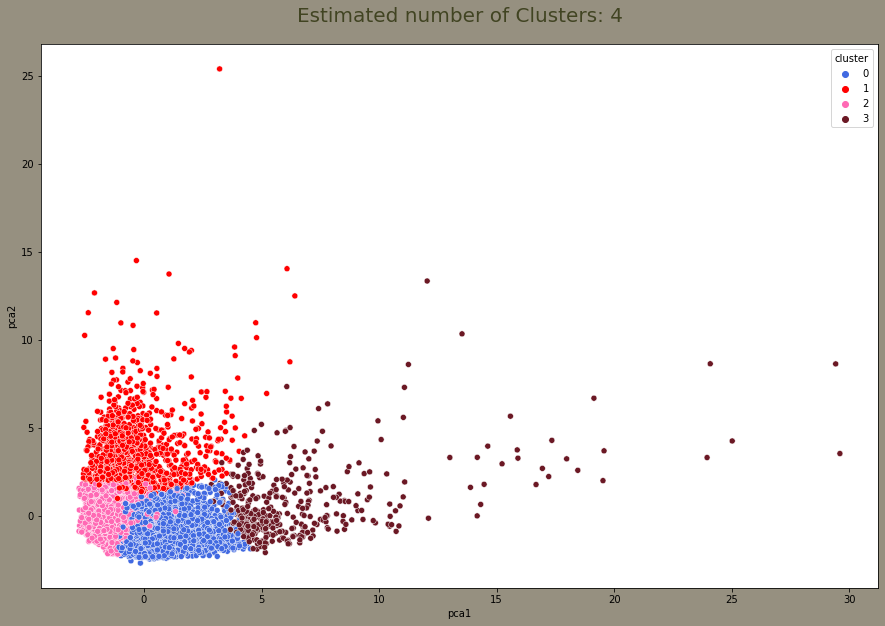

In [103]:
# Plot
plt.figure(figsize = (15,10), facecolor='#969080')
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', 
                     data=pca_df,
                     palette = ['royalblue', 'red', 'hotpink', '#6b1824'])
                               
plt.title('Estimated number of Clusters: 4', fontsize = 20, color='#414422', y=1.03)
plt.show();

<div style="border-radius:10px;
            background-color:#dbd2d8;
            color: #545a4c;
            border-style: solid;
            border-color: #545a4c;
            letter-spacing:0.5px;
            font-family: Open Sans Light; 
            font-size:16px;
            padding: 10px;">
    
### Inspirations & Acknowledgements:
    
        
* MARCO VASQUEZ E: https://www.kaggle.com/code/marcovasquez/useful-html-for-jupyter-notebook/notebook
* Olga Belitskaya: https://www.kaggle.com/datasets/olgabelitskaya/python-recipes?select=dhtml.pyhttps://www.canva.com/
* VinceVence: https://www.kaggle.com/code/vencerlanz09/cans-image-classification-using-yolov5#%F0%9F%94%AEPredict-on-our-own-Test-Image
* Matplotlibhttps:https://matplotlib.org/2.0.0/examples/color/named_colors.html
* Principal Component Analysis: http://www.nlpca.org/pca_principal_component_analysis.html



In [104]:
from IPython.display import display,HTML

c1,f1,f2, fs1='#545a4c','Akronim','Smokum',22

def dhtml(string,fontcolor=c1,font=f1,fontsize=fs1):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family="""\
    +font+"""&effect=3d-float';</style>
    <h1 class='font-effect-3d-float' 
    style='font-family:"""+font+\
    """; color:"""+fontcolor+\
    """; font-size:"""+str(fontsize)+"""px;'>
    %s</h1>"""%string))

dhtml('Made with ❤️')

<h1 style="color:#62544c; font-style:italic; font-family:Open Sans Light;"> <center>Thanks for visiting my notebook!</center> </h1>

<br><center><img src="https://github.com/vainero/Files/blob/main/The_red_girl.gif?raw=true"
      /></center></br>

<h1 style="background-color:#545a4c; color: #dbd2d8; font-family:Open Sans light;font-size:200%;text-align:center;border-radius: 10px 10px;">📌 If you find this notebook useful, I would appreciate an upvote! 👍</h1> 